### Importing and Loading the data

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import pickle

In [83]:
data = pd.read_csv('db/Absenteeism-data-preprocessed.csv')
data

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,Month,Weekday,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,3,0,0,2


## Logistc Regression

<AxesSubplot: >

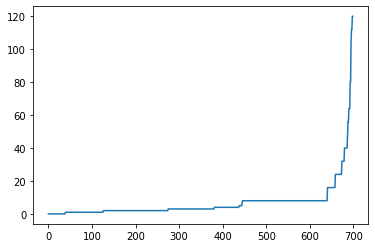

In [84]:
absentTime = sorted(data['AbsenteeismTimeHours'])
    
sns.lineplot(absentTime)

<AxesSubplot: >

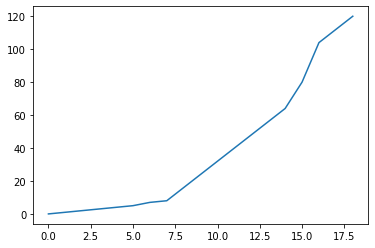

In [85]:
absentTime = sorted(data['AbsenteeismTimeHours'].unique())
    
sns.lineplot(absentTime)

In [86]:
data['AbsenteeismTimeHours'].median()

3.0

In [87]:
data['AbsenteeismTimeHours'].mean()

6.761428571428572

3 hours will be used as the Cut off time for the Absenteeism, more than this will be considered too much

### Setting the classes

In [88]:
targets = np.where(data['AbsenteeismTimeHours'] > data['AbsenteeismTimeHours'].median(),
                    1, 0)  # if the value is > 3 (median), return '1', else, return '0'

    Using the median as a parameter is a way to balance the dataset, since about half of the data will be '0' and the other half will be '1'.

This will prevent the model from learning about only one type of data in expense of the other

In [89]:
data = data.drop(['AbsenteeismTimeHours','DistanceToWork','BodyMassIndex'], axis=1)

data['AbsenteeismExcess'] = targets

data

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,Month,Weekday,TranspExpense,Age,DailyWorkLoadAvg,Education,Children,Pets,AbsenteeismExcess
0,0,0,0,1,7,1,289,33,239.554,1,2,1,1
1,0,0,0,0,7,1,118,50,239.554,1,1,0,0
2,0,0,0,1,7,2,179,38,239.554,1,0,0,0
3,1,0,0,0,7,3,279,39,239.554,1,2,0,1
4,0,0,0,1,7,3,289,33,239.554,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,40,237.656,2,2,0,1
696,1,0,0,0,5,2,225,28,237.656,1,1,2,0
697,1,0,0,0,5,3,330,28,237.656,2,0,0,1
698,0,0,0,1,5,3,235,32,237.656,3,0,0,0


It does not need to be a perfect 50/50%. A ratio of 55/45% is already acceptable

In [90]:
targets.sum() / len(targets)

0.45571428571428574

In [91]:
data['AbsenteeismExcess'].value_counts()

0    381
1    319
Name: AbsenteeismExcess, dtype: int64

### Checkpoint 1

In [92]:
data_backup1 = data.copy()

DataFrame.iloc[row indices, column indices]

In [93]:
unscaled_inputs = data.iloc[:,:-1] # all rows, columns from 1st to second last (13th)
unscaled_inputs

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,Month,Weekday,TranspExpense,Age,DailyWorkLoadAvg,Education,Children,Pets
0,0,0,0,1,7,1,289,33,239.554,1,2,1
1,0,0,0,0,7,1,118,50,239.554,1,1,0
2,0,0,0,1,7,2,179,38,239.554,1,0,0
3,1,0,0,0,7,3,279,39,239.554,1,2,0
4,0,0,0,1,7,3,289,33,239.554,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,40,237.656,2,2,0
696,1,0,0,0,5,2,225,28,237.656,1,1,2
697,1,0,0,0,5,3,330,28,237.656,2,0,0
698,0,0,0,1,5,3,235,32,237.656,3,0,0


### Standardizing the Data

The scaler will subtract the mean of each variable and divide by the standard deviation

The correct would be to apply it to all the data except for the dummy variables

In [94]:
#This will standardize all the data

absenteeism_scaler = StandardScaler()

absenteeism_scaler.fit(unscaled_inputs) # the scaled information will be stored in the 'absenteeism_scaler'

inputs = absenteeism_scaler.transform(unscaled_inputs) # applying the standardization

inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.42368477,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.42368477,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.42368477,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  1.07419067,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.57206611,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.42368477,
        -0.01928035,  0.26848661]])

### Splitting the data

In [95]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size=0.2, random_state=42)

print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#the targets only have one column

(140, 12) (560, 12) (140,) (560,)


##  Modeling

### Training

In [96]:
reg = LogisticRegression()

reg.fit(x_train,y_train) #regression itself

reg.score(x_train,y_train)

0.7857142857142857

    Train accuracy = ~78.57%

In [97]:
reg.intercept_ # aka 'bias'

array([-0.0747047])

In [98]:
reg.coef_ # aka 'weights'

array([[ 1.56559437, -0.16039218,  1.26509042,  1.00356202,  0.131941  ,
        -0.10042155,  0.71688452,  0.15964948, -0.12868318,  0.13861867,
         0.20410254, -0.22862932]])

    Summary table

In [99]:
variables = unscaled_inputs.columns.values

summary = pd.DataFrame(columns=['Variable'], data=variables)

summary['Coefficient'] = np.transpose(reg.coef_) # we need to transpose because by default nd arrays are rows and not columns

summary.sort_values('Coefficient', ascending=False)

,Variable,Coefficient
0,reasonCategory_1,1.565594
2,reasonCategory_3,1.265090
3,reasonCategory_4,1.003562
6,TranspExpense,0.716885
10,Children,0.204103
7,Age,0.159649
9,Education,0.138619
4,Month,0.131941
5,Weekday,-0.100422
8,DailyWorkLoadAvg,-0.128683


    Since we have coefficients that approach zero ('DistanceToWork','BodyMassIndex'), we will go back before the training and remove those columns in order to simplify the model

### Test

In [100]:
reg.score(x_test,y_test)

0.7410714285714286

    Test accuracy = ~74.11%

In [101]:
model_predict = reg.predict_proba(x_test)

# probability > 0.5 = 1
# probability < 0.5 = 0

model_predict[:,1] 

array([0.01046799, 0.29298034, 0.39237441, 0.42090102, 0.60552052,
       0.78755652, 0.44107065, 0.57516479, 0.09907572, 0.34740424,
       0.26511798, 0.48979576, 0.55302114, 0.52143751, 0.22075622,
       0.61884678, 0.03778501, 0.82785736, 0.272954  , 0.55507677,
       0.20783734, 0.26418882, 0.29543645, 0.51263971, 0.21279415,
       0.84800358, 0.56146494, 0.1618355 , 0.24104902, 0.43428523,
       0.1029369 , 0.16917585, 0.43925825, 0.56750522, 0.17571072,
       0.77945459, 0.26798102, 0.17131052, 0.81790791, 0.15427626,
       0.61404943, 0.28992523, 0.48854179, 0.25400188, 0.24476853,
       0.60743387, 0.80884955, 0.85549668, 0.31228962, 0.25495257,
       0.30277523, 0.27095215, 0.58483837, 0.90842605, 0.18051991,
       0.28433419, 0.94586539, 0.19624715, 0.89633772, 0.01882762,
       0.82345799, 0.14077193, 0.50582237, 0.58422095, 0.26511798,
       0.15133224, 0.53550749, 0.04494859, 0.21318174, 0.55471462,
       0.34740424, 0.2760784 , 0.74117403, 0.27095215, 0.22344

## Saving the model

The file has to store the biases and weights obtained with the logistic regression -> object 'reg'

    Pickling => pickle[module] is used for converting a Python object into a character stream

Also allows it to be easily shared and imported on other codes (simmilar to a zip file)

In [102]:
# saving the model

with open('db/AbsenteeismCase_model','wb') as file: # wb = write bytes
    pickle.dump(reg, file) # dump => insert/save the information on the file

In [103]:
# saving the scaler

with open('db/AbsenteeismCase_scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)
